In [80]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [3]:
data=pd.read_excel("data_project.xlsx")

#### Replace ' : ' for NaN

In [4]:
data.replace(':', np.NaN,inplace=True)

In [5]:
data.isnull().sum(axis=1)

0      0
1      1
2      4
3      0
4      0
5      0
6      0
7     22
8      2
9      0
10    12
11     0
12     0
13     0
14     1
15     2
16     0
17     3
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     0
27     0
28     1
29     0
30     0
31     4
32     6
33    10
34     1
35     2
36     0
37    22
38    12
dtype: int64

#### Eliminate rows which have more than 10 missing values

In [6]:
data.drop(data[data.isnull().sum(axis=1) >=10].index, inplace=True)
data= data.set_index('TIME')
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns,index=data.index)


In [7]:
#data['countries']=data['TIME']
data=data.transpose()


In [8]:
data=data.reset_index()

In [9]:
data=data.rename(columns={"index": "Dates"})
data=data.drop(columns='European Union - 27 countries (from 2020)')

In [10]:
 data=data.rename(columns={"Germany (until 1990 former territory of the FRG)": "Germany"})

In [66]:
countries=['Germany','Spain','Italy','Hungary','Poland','Portugal','Netherlands','Austria','United Kingdom','Switzerland']
dates=['2019-03','2019-06','2019-09','2019-12','2020-03','2020-06','2020-09','2020-12']   

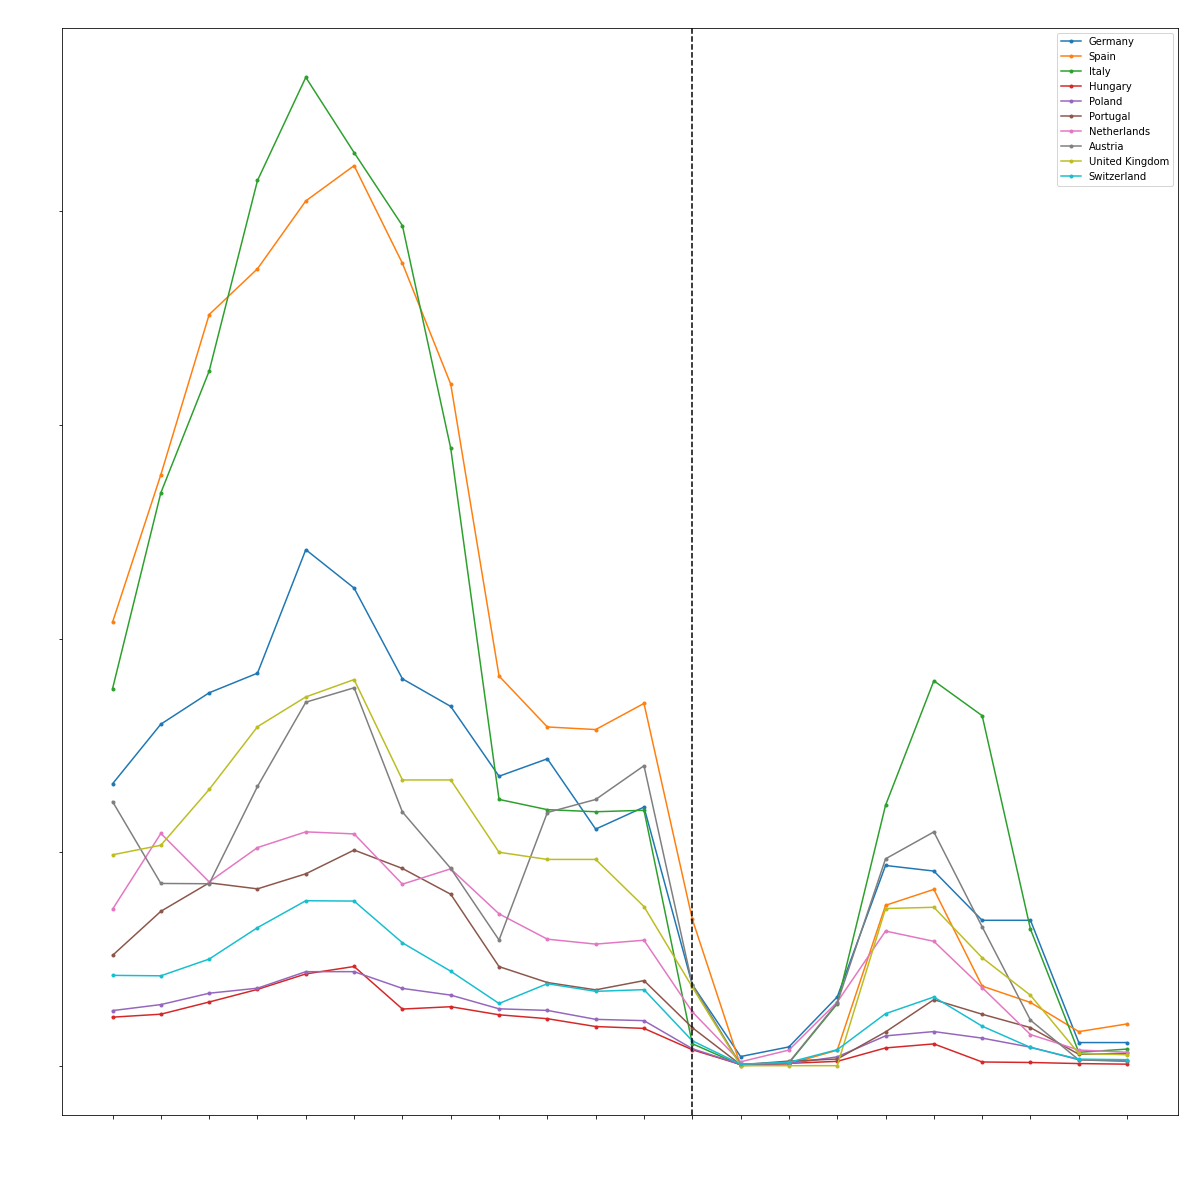

In [15]:
plt.figure(figsize=(20,20))
plt.xlabel('Dates',color='white',fontsize=20)
plt.ylabel('Count',color='white',fontsize=20)
for country in countries:
    plt.plot(data.Dates,data[country],marker='.',label=country)
    plt.title("Summer tourist activities before & after corona",color='white',fontsize=20)
    plt.xticks=(data.Dates[::3])
plt.legend()
plt.gca().tick_params(axis='x', labelcolor='white', rotation=45)   
plt.gca().tick_params(axis='y', labelcolor='white')  
plt.axvline(x='2020-03',linestyle='--',color='black')
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

In [51]:
def millions(x):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-5)

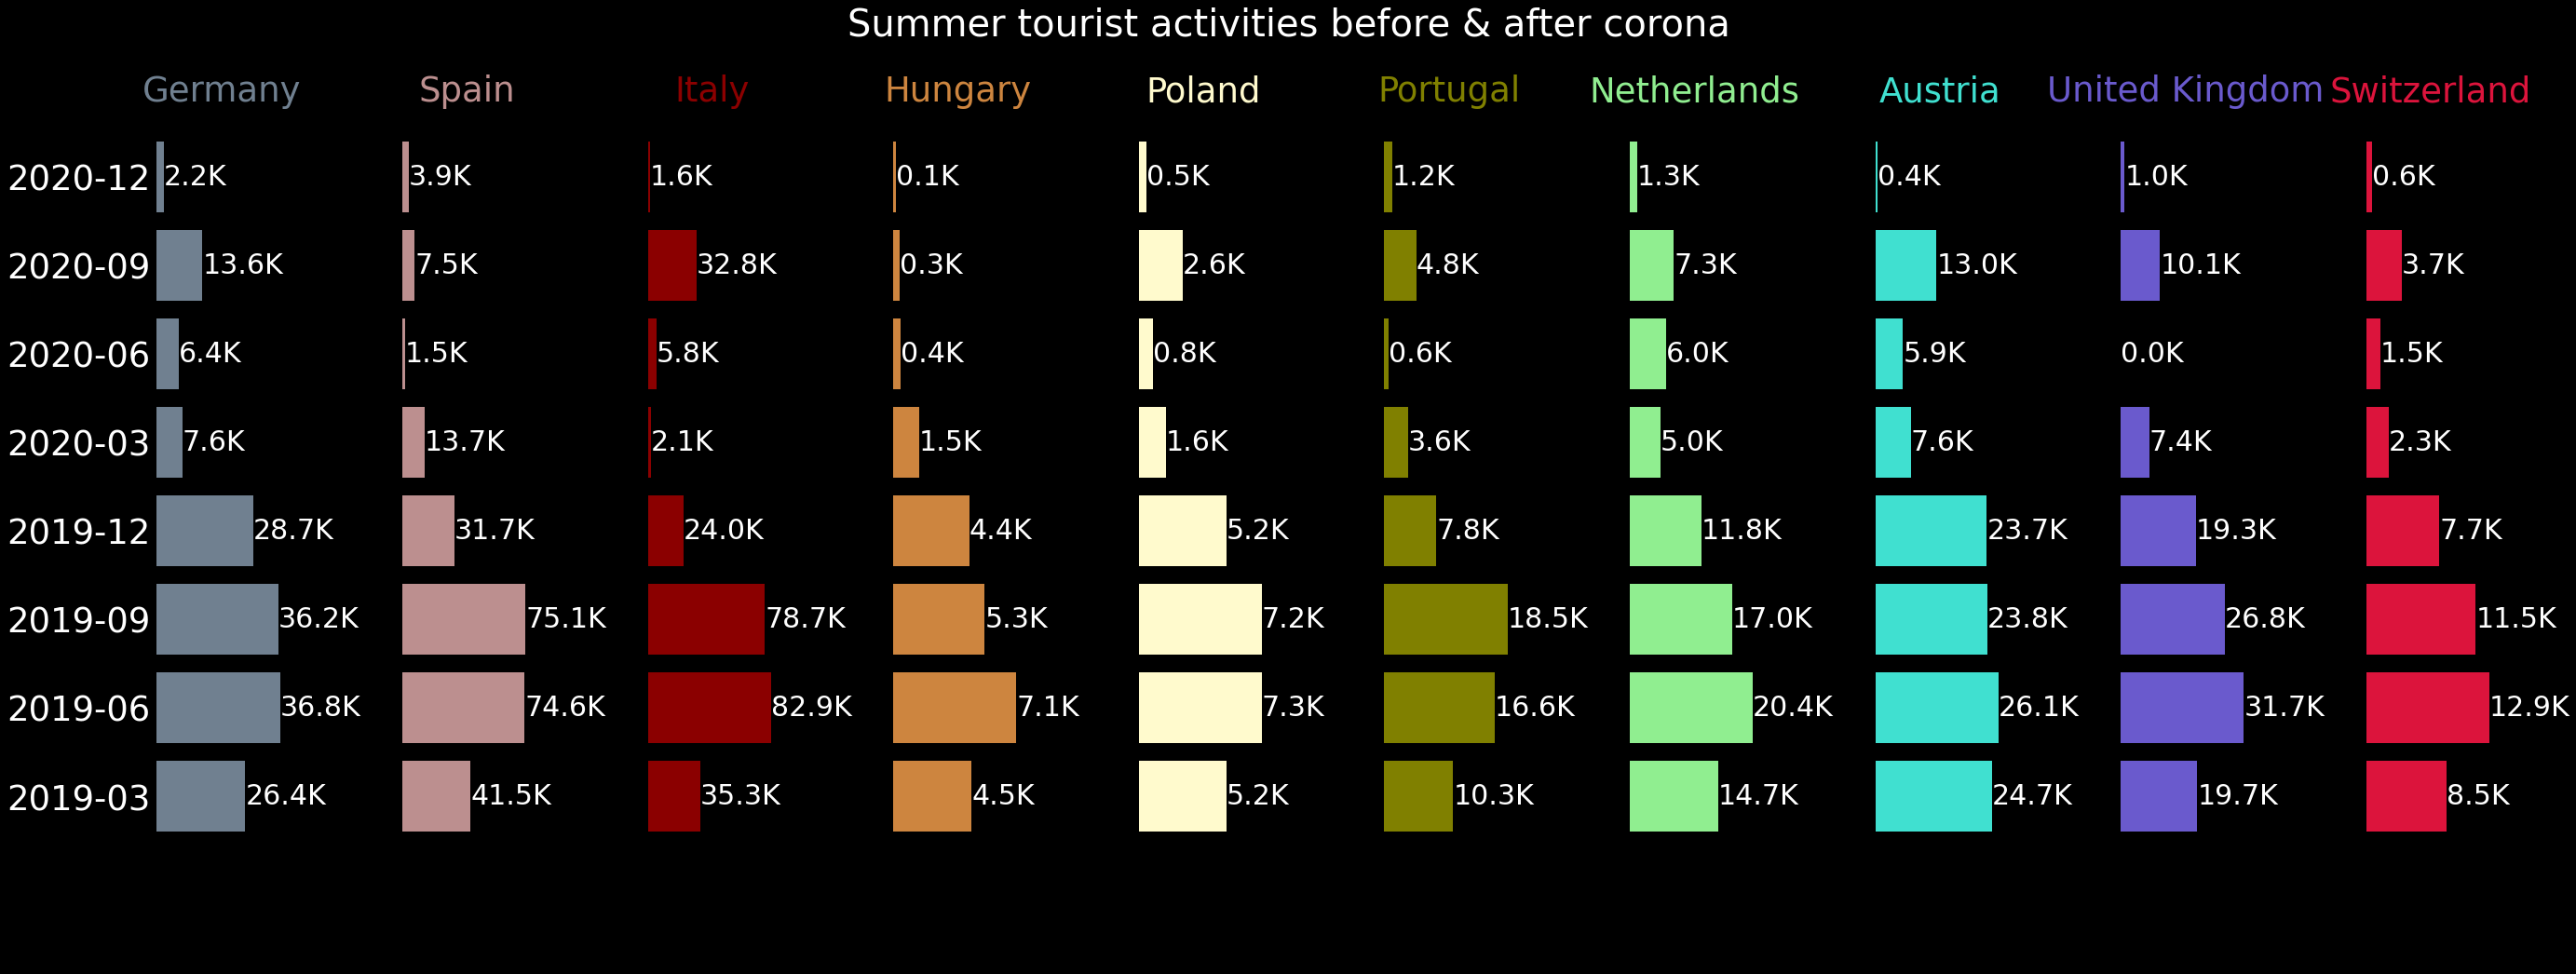

In [244]:
fig = plt.figure(figsize=(45, 15))
color=['slategrey','rosybrown','darkred','peru','lemonchiffon','olive','lightgreen','turquoise','slateblue','crimson']
for i in range(len(countries)):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.barh(data.Dates[::3], data[countries[i]][::3],height=0.8,color=color[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False);
    ax.set_title(countries[i],color=color[i],fontsize=37)
    ax.tick_params(axis='x', labelcolor='black', rotation=45) 
    ax.tick_params(axis='y', labelcolor='white')
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=37)
    ax.set_facecolor('black')
    if i > 0:
        ax.tick_params(labelleft=False) 
    for kew, spine in ax.spines.items():
        spine.set_visible(False)
    for index, v in enumerate(data[countries[i]][::3]):
        ax.text(v,index,str(millions(v)),va='center',fontsize=30,color='white')
plt.suptitle("Summer tourist activities before & after corona",fontsize=40,color='white')
plt.subplots_adjust(wspace=0.9, hspace=0)
plt.gcf().set_facecolor('black')



In [263]:
colors=['#FF0037','#FF2F43','#FA8151','#FFAA5A','#F7DE81','#F9FF65','#E3474B','#E3955A','#D30038','#E2B738']
fig = make_subplots(rows=10, cols=1,vertical_spacing=0.02,print_grid=True)
for i in range(len(countries)):
    fig.add_trace(
        go.Bar(x=data.Dates[::3],y=data[countries[i]][::3],
               marker_color = colors[i],
               name=countries[i],
               marker_line_width=0.2
              ),
        row=i+1, col=1)
   
fig.update_traces(texttemplate=values, textposition='outside')

    
fig.update_layout(height=3000, width=500,
                    title_text="Summer tourist activities before & after corona",
                    template="plotly_dark",
                 )          
   
fig.update_xaxes(tickvals=dates,tickfont_size=8)
fig.update_yaxes(visible=False) 
fig.show()

This is the format of your plot grid:
[ (1,1) x,y      ]
[ (2,1) x2,y2    ]
[ (3,1) x3,y3    ]
[ (4,1) x4,y4    ]
[ (5,1) x5,y5    ]
[ (6,1) x6,y6    ]
[ (7,1) x7,y7    ]
[ (8,1) x8,y8    ]
[ (9,1) x9,y9    ]
[ (10,1) x10,y10 ]



In [228]:
fig.write_image("dvsummertourist.svg")

In [245]:
values=[]
for i in range(len(countries)):
    for index, v in enumerate(data[countries[i]][::3]):
        values.append(str(millions(v)))